In [2]:
import numpy as np
import glob
import os, sys
protomshome = os.environ["PROTOMSHOME"]
sys.path.append(protomshome +"/tools")
from simulationobjects import ResultsFile
import matplotlib.pyplot as plt
%matplotlib inline


# GCMC statistics for ideal gas
An analysis of `ProtoMS` simulations where ideal gas particles are insterted and deleted into a volume. This notebook compares theoretical values for the average number of ideal gas particles with those obtained via simulation.

The average number of dummy particles in the GCMC volume, denoted $N$, should be given by

$$ \ln(N) = B $$

where $B$ is the applied Adams value. GCMC simulations of dummy particles at different values of $B$ should produce results in agreement with the above.

Reading in the simulation data:

In [3]:
directories = ['out+2','out+1','out0','out-1','out-2','out-3','out-4','out-4']
skip = 200
N_inst = []
N_mean = []
B = []

for dirs in directories:
    folders =  glob.glob(dirs)
    if len(folders)==0:
        print "\nError. No folder(s) matching '%s'. Exiting program.\n" % directories
        break
    for folder in folders:
        results = ResultsFile()
        resultsfiles = glob.glob(folder+ "/"+'results'+"*")
        if len(resultsfiles) > 1: # It is assumed the results are from ProtoMS 2.
            results.read([folder,'results'])
        elif len(resultsfiles)==1: # It is assumed the results are from ProtoMS 3.
            results.read(folder+ "/"+'results')
        else:
            print "\nError. No results file matching %s. Exiting program\n" % folder+"/"+'results'
            break
        solventson = np.array([snap.solventson for snap in results.snapshots])# Counting how many molecules have been inserted.
        N_inst.append(solventson)
        mean_on = np.mean(solventson[skip:solventson.size])
        N_mean.append(mean_on)
        adams = np.array([snap.bvalue for snap in results.snapshots])# Recording the B-value for each window (should be constant, but averaging just in case).
        mean_adams = np.mean(adams[(skip-1):adams.size])
        B.append(mean_adams)
print "\n...GCMC data has been read."

  # Checking to make sure the data makes sense.
N_mean = np.array(N_mean)
B = np.array(B)


...GCMC data has been read.


Ploting the average number of inserted dummy particles as a function of $B$. The simulation data is in blue, and they should line up with the $y=x$ in red.

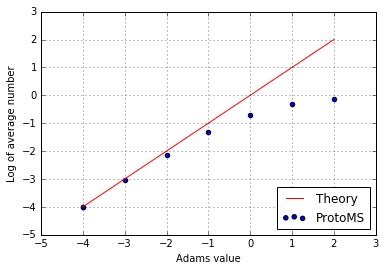

In [5]:
plt.scatter(B,np.log(N_mean))
plt.plot(B,B,color='red')
plt.xlabel('Adams value')
plt.ylabel('Log of average number')
plt.legend(('Theory','ProtoMS'),loc=4)
plt.grid()
plt.show()

The deviation of the simulation data from theory is probably due to the warning
```
 No spare gcsolutes to insert. This will bias your simulation results.
```
despite the fact that there are indeed spare solutes to insert. Looks like a bug.